In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
wells = pd.read_csv('/work/Carpe-Datum-2022/Well_Head_and_Completion.csv')
wm = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_AI.csv')
wells = wells.merge(wm, how='left', left_on='WELL', right_on='well_id',).drop_duplicates('WELL')
new = pd.read_csv('new_df2.csv')
wells = wells.merge(new, how='left', left_on='WELL', right_on='Unnamed: 0', suffixes=(None,'_y'))
wells['line'] = -.29*wells['Y(ft)']+154670
time = pd.read_csv('/work/Carpe-Datum-2022/Production_History_Field.csv')
z = pd.DataFrame()
z['Start Date'] = time['Date'].iloc[time.drop('Date',axis=1).ne(0).idxmax()]
z['Well'] = time.drop('Date', axis=1).columns
z['Well'] = z['Well'].str.replace('WOPR:','').str.replace('\(bbl/day\)','')
z['Age'] = (pd.to_datetime('today') - pd.to_datetime(z['Start Date'])).dt.days
wells = wells.merge(z, how='left', left_on='WELL', right_on='Well')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
data = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_AVG.csv')
data2 = pd.read_csv('/work/Carpe-Datum-2022/EDA_notebooks/two_year_forecast.csv')
data2['Well'] = data2['Unnamed: 0'].str.replace('WOPR:','').str.replace('\(bbl/day\)','')
data = data.merge(data2[['sum','Well']], left_on='well_id', right_on='Well')
data['diff_lower'] = data['AI_lower(2021-12-20)'] - data['AI_lower(2012-01-01)']
data['diff_upper'] = data['AI_upper(2021-12-20)'] - data['AI_upper(2012-01-01)']
data['log_sum'] = np.log(data['sum'])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
data['log_sum'] = np.log(data['sum'])

In [6]:
wells = pd.read_csv('/work/Carpe-Datum-2022/Well_Head_and_Completion.csv')
wm = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_AI.csv')
wells = wells.merge(wm, how='left', left_on='WELL', right_on='well_id',).drop_duplicates('WELL')
new = pd.read_csv('new_df2.csv')
wells = wells.merge(new, how='left', left_on='WELL', right_on='Unnamed: 0', suffixes=(None,'_y'))
wells['line'] = -.29*wells['Y(ft)']+154670
time = pd.read_csv('/work/Carpe-Datum-2022/Production_History_Field.csv')
z = pd.DataFrame()
z['Start Date'] = time['Date'].iloc[time.drop('Date',axis=1).ne(0).idxmax()]
z['Well'] = time.drop('Date', axis=1).columns
z['Well'] = z['Well'].str.replace('WOPR:','').str.replace('\(bbl/day\)','')
z['Age'] = (pd.to_datetime('today') - pd.to_datetime(z['Start Date'])).dt.days
wells = wells.merge(z, how='left', left_on='WELL', right_on='Well')

data = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_AVG.csv')
data2 = pd.read_csv('/work/Carpe-Datum-2022/EDA_notebooks/two_year_forecast.csv')
data2['Well'] = data2['Unnamed: 0'].str.replace('WOPR:','').str.replace('\(bbl/day\)','')
data = data.merge(data2[['sum','Well']], left_on='well_id', right_on='Well')
data['diff_lower'] = data['AI_lower(2021-12-20)'] - data['AI_lower(2012-01-01)']
data['diff_upper'] = data['AI_upper(2021-12-20)'] - data['AI_upper(2012-01-01)']
data['log_sum'] = np.log(data['sum'])

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


In [51]:
# from sklearn.metrics import mean_squared_error
# import scipy.interpolate as interpolate
# import time

# def validate(model, features):
#     tot_mae = 0
#     ai = pd.read_csv('/work/Carpe-Datum-2022/AI.csv')
#     ai = ai.rename({'X(ft)':'X','Y(ft)':'Y'}, axis=1)
#     for i, well in enumerate(data['Well']):
#         d = data[data['Well'] != well] #the data without the current well
#         dd = data[data['Well'] == well] #the current well to predict
#         model.fit(d[features], d['log_sum']) #predict well prod based on features 
#         to_predict = pd.Series()

#         for feature in features: #iterate through each feature
#             #print(feature)
#             #print(feature)
#             #if the feature is one of the precalculated well features 
#             #t1 = time.time()
#             if feature in ['X', 'Y', 'AI_lower(2012-01-01)', 'AI_upper(2012-01-01)', 'AI_lower(2021-12-20)', 'AI_upper(2021-12-20)']:
#                 to_predict[feature] = dd.iloc[0][feature]
#                 continue
#             #if its the difference in acoustic impedence from the lower set
#             if feature == 'diff_lower':
#                 ai['diff_lower'] = ai['AI_lower(2021-12-20)'] - ai['AI_lower(2012-01-01)']
#                 to_predict[feature] = interpolate.griddata(ai[['X','Y']], ai[feature], dd[dd['Well'] == well].iloc[0][['X','Y']],method='linear')
#                 continue
#             #if its the difference from the upper set
#             if feature == 'diff_upper':
#                 ai['diff_upper'] = ai['AI_upper(2021-12-20)'] - ai['AI_upper(2012-01-01)']
#                 to_predict[feature] = interpolate.griddata(ai[['X','Y']], ai[feature], dd[dd['Well'] == well].iloc[0][['X','Y']],method='linear')
#                 continue
#             #if the feature is the zone (we make all predictions in zone 0)
#             if feature == 'Zone':
#                 ai['Zone'] = 0
#                 to_predict['Zone'] = 0
#                 continue
            
#             #t2 = time.time()
#             #print(t2-t1)

#             if i == 0:
#                 knn = KNeighborsRegressor(n_neighbors=10, weights = 'distance')
#                 knn.fit(d[['X','Y']], d[[feature]])
#                 ai[feature] = interpolate.griddata(data[['X','Y']], data[feature], ai[['X','Y']],method='linear')
#                 missing = np.isnan(ai[feature])
#                 results = knn.predict(ai[missing][['X','Y']])
#                 ai.loc[missing, feature] = results.flatten()
#             # print(i)

#             to_predict[feature] = interpolate.griddata(d[['X','Y']], d[feature], data[data['Well'] == well].iloc[0][['X','Y']],method='linear')[0]
            
#             if np.isnan(to_predict[feature]):
#                 knn = KNeighborsRegressor(n_neighbors=10, weights = 'distance')
#                 knn.fit(d[['X','Y']], d[[feature]])
#                 results = knn.predict(dd[['X','Y']])[0]
#                 to_predict[feature] = results[0]
#             #print(to_predict)
            
#             #print(feature)
#         pred = np.exp(model.predict(to_predict.to_numpy().reshape(1,-1)))
#         #pred = np.exp(model.predict(dd.iloc[0][features].to_numpy().reshape(1,-1)))
#         #print(pred)
#         tot_mae += 100/48*np.abs((pred[0] - data[data['Well'] == well].iloc[0]['sum']) / data[data['Well'] == well].iloc[0]['sum'])

#     t = np.linspace(75000, 97500, 100)
#     fault = -.29*t + 154670

#     plt.figure(figsize=(23,20))
#     ai['pred'] = np.exp(model.predict(ai[features]))
#     #plt.scatter(sum_interp['Y'], sum_interp['X'], c=sum_interp['PORO(v/v)'], )
#     plt.scatter(ai['Y'], ai['X'], c=ai['PORO(v/v)'], )
#     #mynorm = plt.Normalize(vmin=0, vmax=100000)
#     plt.colorbar()
#     uppers = wells
#     plt.scatter(uppers['Y(ft)'], uppers['X(ft)'], s=50, c='black', cmap='gray')

#     plt.title('Prediction', fontsize=30)
#     plt.xlabel("Y(ft)", fontsize=20)
#     plt.ylabel("X(ft)", fontsize=20)
#     plt.scatter(t, fault, s=5, c='black', marker='x', label='faultline')
#     plt.show()

#     return tot_mae / data['Well'].shape[0]

In [175]:
x = NearestNeighbors().fit(data[['X','Y']]).radius_neighbors(data[['X','Y']], radius=3000)[1]
n = [len(u) for u in x]
n

[9,
 4,
 7,
 1,
 6,
 10,
 4,
 4,
 4,
 8,
 4,
 6,
 9,
 6,
 5,
 5,
 1,
 5,
 7,
 3,
 7,
 7,
 2,
 4,
 6,
 5,
 2,
 10,
 5,
 7,
 9,
 6,
 4,
 5,
 5,
 7,
 11,
 6,
 6,
 2,
 6,
 9,
 4,
 4,
 2,
 6,
 2,
 5,
 1]

In [210]:
data[['X','Y']]

,X,Y
0,137106.82,83818.47
1,132460.98,85832.77
2,134042.86,82411.27
3,133136.98,93691.55
4,119311.27,89234.02
5,134837.26,83865.82
6,109560.26,86833.62
7,112898.58,91601.46
8,112766.46,88549.74
9,117798.78,90645.70


In [306]:
from sklearn.metrics import mean_squared_error
import scipy.interpolate as interpolate
from sklearn.neighbors import NearestNeighbors
import time

def validate(model, features):
    tot_mae = 0
    ai = pd.read_csv('/work/Carpe-Datum-2022/AI.csv')
    ai = ai.rename({'X(ft)':'X','Y(ft)':'Y'}, axis=1)
    r = 2000
    for i, well in enumerate(data['Well']):
        d = data[data['Well'] != well] #the data without the current well
        dd = data[data['Well'] == well] #the current well to predict
        if 'Neighbor' in features:
            nn = NearestNeighbors().fit(d[['X','Y']]).radius_neighbors(d[['X','Y']], radius=r)[1]
            d['Neighbor'] = [len(u) for u in nn]
        model.fit(d[features], d['log_sum'],) #predict well prod based on features 
        to_predict = pd.Series()
        well_n = NearestNeighbors()

        for feature in features: #iterate through each feature
            #print(feature)
            #print(feature)
            #if the feature is one of the precalculated well features 
            #t1 = time.time()

            knn_tp = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10, weights = 'distance', p=2))
            knn_tp.fit(d[['X','Y','AI_lower(2012-01-01)']], d[[feature]])

            if feature in ['X', 'Y', 'AI_lower(2012-01-01)', 'AI_upper(2012-01-01)', 'AI_lower(2021-12-20)', 'AI_upper(2021-12-20)']:
                to_predict[feature] = dd.iloc[0][feature]
                continue
            #if its the difference in acoustic impedence from the lower set
            if feature == 'diff_lower':
                ai['diff_lower'] = ai['AI_lower(2021-12-20)'] - ai['AI_lower(2012-01-01)']
                to_predict[feature] = knn_tp.predict(dd[['X','Y','AI_lower(2012-01-01)']]).reshape(-1,1)
                continue
            #if its the difference from the upper set
            if feature == 'diff_upper':
                ai['diff_upper'] = ai['AI_upper(2021-12-20)'] - ai['AI_upper(2012-01-01)']
                to_predict[feature] = knn_tp.predict(dd[['X','Y','AI_lower(2012-01-01)']]).reshape(-1,1)
                continue
            #if the feature is the zone (we make all predictions in zone 0)
            if feature == 'Neighbor':
                #d[feature] = NearestNeighbors().fit(d[['X','Y']]).radius_neighbors(d[['X','Y']])
                nn = NearestNeighbors().fit(d[['X','Y']]).radius_neighbors(ai[['X','Y']], radius=r)[1]
                ai['Neighbor'] = [len(u) for u in nn]
                nn = NearestNeighbors().fit(d[['X','Y']]).radius_neighbors(to_predict[['X','Y']].to_numpy().reshape(1,-1), radius=r)[1]
                print(nn)
                to_predict['Neighbor'] = [len(u) for u in nn]
            if feature == 'Zone':
                ai['Zone'] = 0
                to_predict['Zone'] = 0
                continue
            
            #t2 = time.time()
            #print(t2-t1)

            if i == 0:
                knn_ai = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10, weights = 'distance', p=2))
                knn_ai.fit(d[['X','Y','AI_lower(2012-01-01)']], d[[feature]])
                #ai[feature] = interpolate.griddata(data[['X','Y']], data[feature], ai[['X','Y']],method='linear')
                #missing = np.isnan(ai[feature])
                results = knn_ai.predict(ai[['X','Y','AI_lower(2012-01-01)']])
                #print(results.shape)
                #print(ai.shape)
                ai[feature] = results.reshape(-1,1)
            # print(i)

            #to_predict[feature] = interpolate.griddata(d[['X','Y']], d[feature], data[data['Well'] == well].iloc[0][['X','Y']],method='linear')[0]
            to_predict[feature] = knn_tp.predict(dd[['X','Y','AI_lower(2012-01-01)']]).reshape(-1,1)

            # if np.isnan(to_predict[feature]):
            #     results = knn_tp.predict(dd[['X','Y']])[0]
            #     to_predict[feature] = results[0]
            #print(to_predict)
            
            #print(feature)
        pred = np.exp(model.predict(to_predict.to_numpy().reshape(1,-1)))
        #pred = np.exp(model.predict(dd.iloc[0][features].to_numpy().reshape(1,-1)))
        #print(pred)
        tot_mae += 100/48*np.abs((pred[0] - data[data['Well'] == well].iloc[0]['sum']) / data[data['Well'] == well].iloc[0]['sum'])

    t = np.linspace(75000, 97500, 100)
    fault = -.29*t + 154670

    plt.figure(figsize=(15,10))
    ai['pred'] = np.exp(model.predict(ai[features]))
    #plt.scatter(sum_interp['Y'], sum_interp['X'], c=sum_interp['PORO(v/v)'], )
    plt.scatter(ai['Y'], ai['X'], c=ai['Porosity'], label='Interpolated Porosity')
    #mynorm = plt.Normalize(vmin=0, vmax=100000)
    #plt.colorbar()
    uppers = wells
    plt.scatter(uppers['Y(ft)'], uppers['X(ft)'], s=50, c='black', cmap='gray')

    plt.title('Recommended Well Location', fontsize=30)
    plt.xlabel("Y(ft)", fontsize=20)
    plt.ylabel("X(ft)", fontsize=20)
    plt.scatter(t, fault, s=5, c='black', marker='x', label='faultline')
    plt.scatter(y=[112546.64], x=[89091.36], c='red', marker='x', s=200, label='Well')
    plt.scatter(y=[115039.44], x=[89878.56], c='red', marker='x', s=200)
    plt.scatter(y=[113639.44], x=[89700.56], c='red', marker='x', s=200)
    plt.legend(fontsize=15)
    plt.show()

    return tot_mae / data['Well'].shape[0], ai

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/shared-libs/python3.7/py-core/lib/python3.7/site-packag

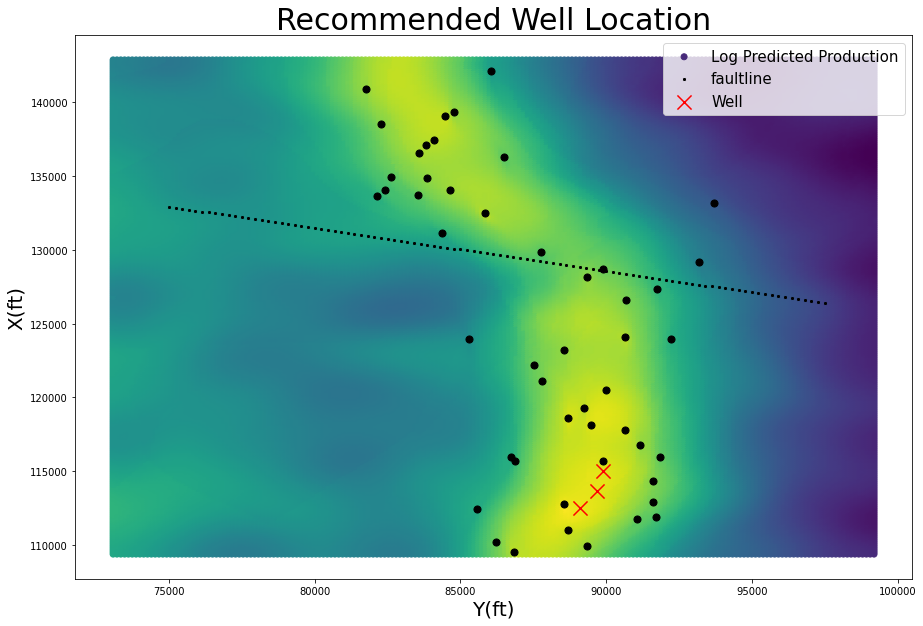

(28.122229008250052,                X         Y  AI_lower(2012-01-01)  AI_upper(2012-01-01)  \
0      109397.84  99193.76           6245.484387           6263.763220   
1      109397.84  99062.56           6245.727488           6263.944840   
2      109397.84  98931.36           6246.111283           6264.050487   
3      109397.84  98800.16           6246.627959           6264.078733   
4      109397.84  98668.96           6247.270327           6264.039096   
...          ...       ...                   ...                   ...   
51195  142853.84  73609.76           6334.401793           6260.202243   
51196  142853.84  73478.56           6335.324532           6259.040527   
51197  142853.84  73347.36           6336.350363           6257.905630   
51198  142853.84  73216.16           6337.487009           6256.806460   
51199  142853.84  73084.96           6338.736362           6255.746525   

       AI_lower(2021-12-20)  AI_upper(2021-12-20)  PORO(v/v)       pred  
0               

In [308]:
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor
np.random.seed(99998)

#make_pipeline(PolynomialFeatures(), LinearRegression())
z=validate(LinearRegression(), ['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)','X','Y','PORO(v/v)'])
print(z)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/shared-libs/python3.7/py-core/lib/python3.7/s

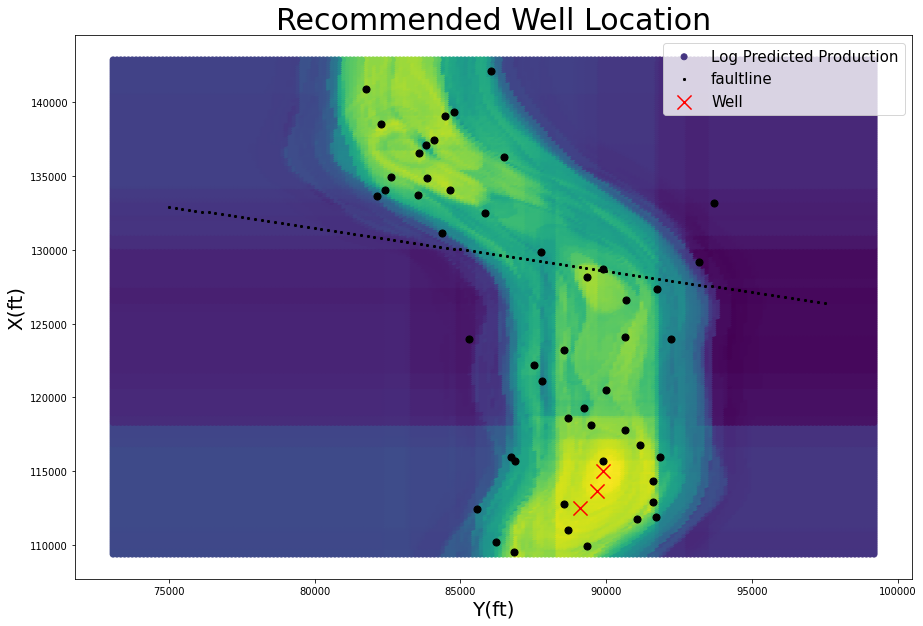

20.12411491498955


In [307]:
z, ai=validate(RandomForestRegressor(), ['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)','X','Y'])
print(z)

In [261]:
ai[ai['pred'] == ai['pred'].max()]

,X,Y,AI_lower(2012-01-01),AI_upper(2012-01-01),AI_lower(2021-12-20),AI_upper(2021-12-20),pred
8671,115039.44,89878.56,6581.696764,6516.013459,6679.265445,6545.110847,36510.12566


In [246]:
ai[ai['pred'] == ai['pred'].max()]

,X,Y,AI_lower(2012-01-01),AI_upper(2012-01-01),AI_lower(2021-12-20),AI_upper(2021-12-20),pred
4877,112546.64,89091.36,6558.364865,6514.932373,6662.951862,6545.671369,29901.401651


In [286]:
output = np.array([113639.44, 89700.56]).reshape(1,2)
v = interpolate.griddata(ai[['X','Y']], ai['pred'], output, method='linear')[0]

In [287]:
v

28187.677289167696

In [281]:
ai[['X','Y']].shape

(51200, 2)

In [294]:
i = pd.read_csv('/work/Carpe-Datum-2022/Sample_Submission.csv')
i.loc[0] = [112546.64, 89091.36, 'Lower', 29901.401*30.4]
i.loc[1] = [115039.44, 89878.56, 'Lower', 36510.12*30.4]
i.loc[2] = [113639.44, 89700.56, 'Lower',28187.67*30.4]
i.to_csv('/work/Carpe-Datum-2022/scoring/submission/Real_Submission.csv')

In [ ]:
x1, y1, prod1 = 112546.64, 89091.36, 29901
x2, y2, prod2 = 

In [ ]:
import scipy.interpolate as interpolate
ai = pd.read_csv('/work/Carpe-Datum-2022/AI.csv')
ai = ai.rename({'X(ft)':'X','Y(ft)':'Y'}, axis=1)
ai['diff_lower'] = ai['AI_lower(2021-12-20)'] - ai['AI_lower(2012-01-01)']
ai['diff_upper'] = ai['AI_upper(2021-12-20)'] - ai['AI_upper(2012-01-01)']
ai['PORO(v/v)'] = interpolate.griddata(data[['X','Y']], data['PORO(v/v)'], ai[['X','Y']],method='linear')
ai['PORO(v/v)'] = ai['PORO(v/v)'].fillna(0)
ai['Zone'] = 0
# ai['perm_est'] = interpolate.griddata(data[['X','Y']], data['perm_est'], ai[['X','Y']],method='linear')
# ai['perm_est'] = ai['perm_est'].fillna(0)
#ai['DT(us/ft)'] = interpolate.griddata(data[['X','Y']], data['DT(us/ft)'], ai[['X','Y']],method='linear')
#ai['DT(us/ft)'] = ai['DT(us/ft)'].fillna(0)
# ai['ROP'] = interpolate.griddata(data[['X','Y']], data['ROP'], ai[['X','Y']],method='linear')
# ai['ROP'] = ai['ROP'].fillna(0)
# ai['PEF(B/E)'] = interpolate.griddata(data[['X','Y']], data['PEF(B/E)'], ai[['X','Y']],method='linear')
# ai['PEF(B/E)'] = ai['PEF(B/E)'].fillna(0)
ai['pred'] = pipeline.predict(ai)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [234]:
#new_locs - array(x1,x2,x3,y1,y2,y3)
#

features = ['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)','X','Y']
model = LinearRegression()
model.fit(data[features], data['sum'])

well_locs = data[['X','Y']]

def obj_func(new_locs):
    
    new_x = new_locs[:3]
    new_y = new_locs[3:]
    loc_frame = pd.DataFrame()
    loc_frame['X'] = new_x
    loc_frame['Y'] = new_y
    for f in ['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)']:
        loc_frame[f] = np.nan_to_num(interpolate.griddata(data[['X','Y']], data[f], loc_frame[['X','Y']],method='linear'),0)
    fitness = sum(model.predict(loc_frame[features]))


    return -1*fitness




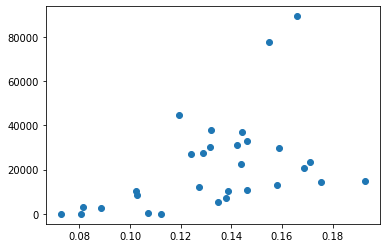

In [ ]:

u = data[data['Completion Zone'] == 0]
np.corrcoef(u['AI_lower(2012-01-01)'], u['sum'])
plt.scatter(u['PORO(v/v)'], u['sum'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b71fecc-b405-4b93-bce3-c5ed6c21c449' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>